Epoch 1/100


C:\Users\idrak\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\idrak\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\idrak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0099 - loss: 2.0746 - val_accuracy: 0.0312 - val_loss: 1.9533
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1188 - loss: 1.9246 - val_accuracy: 0.4375 - val_loss: 1.8078
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4230 - loss: 1.7908 - val_accuracy: 0.4570 - val_loss: 1.6651
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4273 - loss: 1.6578 - val_accuracy: 0.4844 - val_loss: 1.5278
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 1.5302 - val_accuracy: 0.5039 - val_loss: 1.4039
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4433 - loss: 1.4182 - val_accuracy: 0.5117 - val_loss: 1.3053
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4639 - loss: 1.3323 - val_accuracy: 0.5156 - val_loss: 1.2381
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5262 - loss: 1.2487 - val_accuracy: 0.5195 - val_loss: 1.

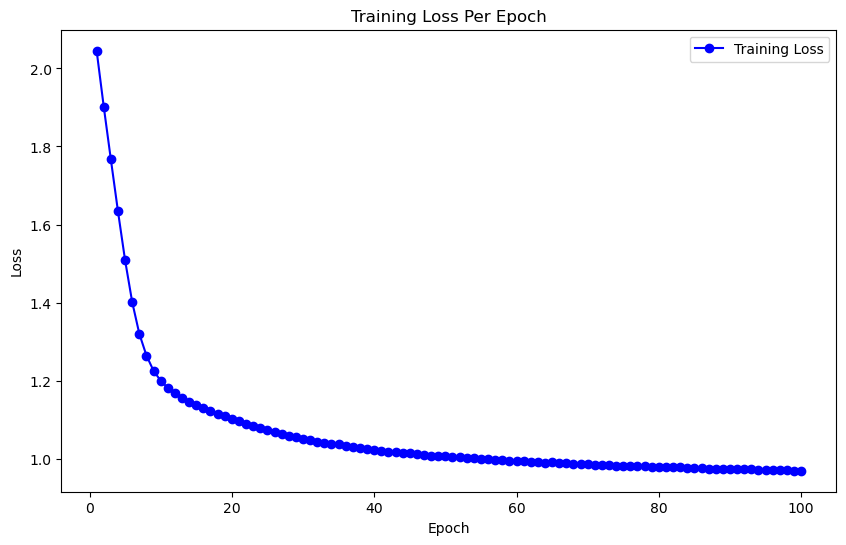

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Predicted class: 5, Actual class: [6]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [6]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [6]
Predicted class: 5, Actual class: [5]
Predicted class: 5, Actual class: [5]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [5]
Predicted class: 6, Actual class: [6]
Predicted class: 7, Actual class: [7]
Predicted class: 5, Actual class: [3]
Predicted class: 6, Actual class: [5]
Predicted class: 5, Actual class: [5]
Predicted class: 5, Actual class: [6]
Predicted class: 7, Actual class: [7]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [7]
Predicted class: 7, Actual class: [8]
Predicted class: 5, Actual class: [5]
Predicted class: 5, Actual class: [5]
Predicted class: 5, Actual class: [6]
Predicted class: 6, Actual class: [5]
Predicted class: 7, Actual class: [6]
Predicted class: 5, Actual class: [6]
Predicted 

In [4]:
#dataanalysisandwrangling 
import pandas as pd
import numpy as np
import seaborn as sns
#visualization importseabornassns
import matplotlib.pyplot as plt
%matplotlib inline
#scalingandtraintestsplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#creatingamodel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

file_path = 'R_W_Wine_quality.csv'
data1 = pd.read_csv(file_path)
data1

df=data1[data1['type']=='Red']
df

data=df
data

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y1_labels = ['quality']
y2_labels = ['type']

X = data[features]
y1 = data[y1_labels]
y2 = data[y2_labels]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

X_train_scaled = MinMaxScaler().fit_transform(X_train[features])
X_test_scaled = MinMaxScaler().fit_transform(X_test[features])


label_encoder = LabelEncoder()


y1_train_encoded = label_encoder.fit_transform(y1_train)
y1_test_encoded = label_encoder.fit_transform(y1_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    #Dense(32, activation='relu'),
    Dense(7, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])


history = model.fit(X_train_scaled, y1_train_encoded, validation_split=0.2, epochs=100, batch_size=100, verbose=1)

training_loss=history.history['loss']
epochs = range(1, len(training_loss) + 1)

#plotting the training loss
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

predictions = model.predict(X_test_scaled)

predicted_classes = predictions.argmax(axis=1)

predicted_labels = label_encoder.inverse_transform(predicted_classes)



for predicted_label, actual_label1 in zip(predicted_labels, y1_test_encoded):
    actual_label_name1 = label_encoder.inverse_transform([actual_label1])
    
    print(f"Predicted class: {predicted_label}, Actual class: {actual_label_name1}")

correct_predictions = (predicted_labels == label_encoder.inverse_transform(y1_test_encoded)).sum()
accuracy = correct_predictions / len(y1_test)
print(f"Accuracy:{accuracy:.4f}")




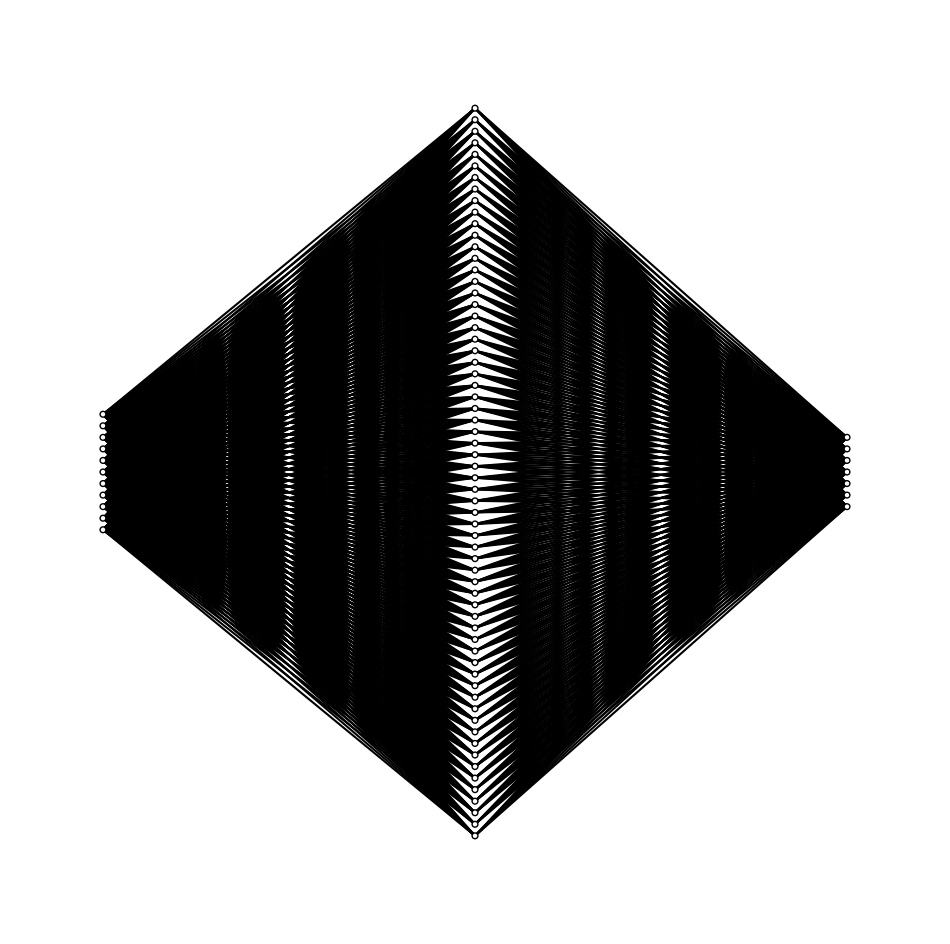

In [5]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top-bottom)/float(max(layer_sizes))
    h_spacing= (right - left)/float(len(layer_sizes)-1)
    #nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top=v_spacing*(layer_size-1)/2. + (top+bottom)/2
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing),v_spacing/4.,
                              color='w' , ec='k' , zorder=4)
            ax.add_artist(circle)
    #Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing +left, (n+1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [11, 64, 7])

C:\Users\idrak\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\idrak\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\idrak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2143 - loss: 1.9019 - val_accuracy: 0.4541 - val_loss: 1.6258
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 1.5658 - val_accuracy: 0.4579 - val_loss: 1.3770
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4458 - loss: 1.3580 - val_accuracy: 0.4579 - val_loss: 1.2931
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4488 - loss: 1.3036 - val_accuracy: 0.4592 - val_loss: 1.2646
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4546 - loss: 1.2688 - val_accuracy: 0.4758 - val_loss: 1.2398
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 1.2347 - val_accuracy: 0.4783 - val_loss: 1.2202
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4737 - loss: 1.2371 - val_accuracy: 0.5102 - val_loss: 1.2039
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4959 - loss: 1.2106 - val_accuracy: 0.5077 - v

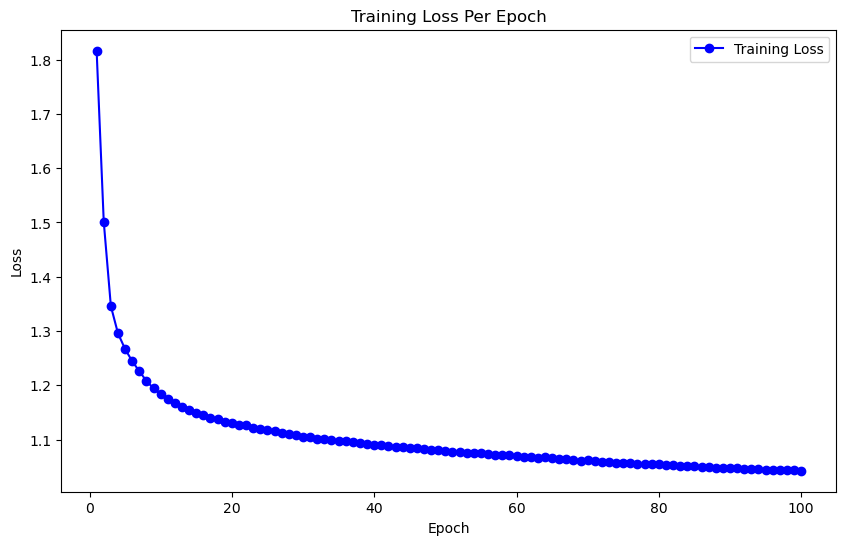

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted class: 6, Actual class: [7]
Predicted class: 6, Actual class: [8]
Predicted class: 6, Actual class: [8]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [7]
Predicted class: 6, Actual class: [6]
Predicted class: 5, Actual class: [5]
Predicted class: 5, Actual class: [4]
Predicted class: 6, Actual class: [6]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [7]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [7]
Predicted class: 5, Actual class: [6]
Predicted class: 6, Actual class: [5]
Predicted class: 6, Actual class: [5]
Predicted class: 6, Actual class: [8]
Predicted class: 6, Actual class: [5]
Predicted class: 6, Actual class: [7]
Predicted class: 5, Actual class: [6]
Predicted class: 6, Actual class: [6]
Predicted class: 6, Actual class: [7]
Predicted class: 5, Actual class: [5]
Predicted class: 6, Actual class: [5]
Predicted class: 6, Actual class: [8]
Predicted 

In [6]:
#dataanalysisandwrangling 
import pandas as pd
import numpy as np
import seaborn as sns
#visualization importseabornassns
import matplotlib.pyplot as plt
%matplotlib inline
#scalingandtraintestsplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#creatingamodel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

file_path = 'R_W_Wine_quality.csv'
data1 = pd.read_csv(file_path)
data1

df=data1[data1['type']=='White']
df

data=df
data

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y1_labels = ['quality']
y2_labels = ['type']

X = data[features]
y1 = data[y1_labels]
y2 = data[y2_labels]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

X_train_scaled = MinMaxScaler().fit_transform(X_train[features])
X_test_scaled = MinMaxScaler().fit_transform(X_test[features])


label_encoder = LabelEncoder()


y1_train_encoded = label_encoder.fit_transform(y1_train)
y1_test_encoded = label_encoder.fit_transform(y1_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    #Dense(32, activation='relu'),
    Dense(7, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])


history = model.fit(X_train_scaled, y1_train_encoded, validation_split=0.2, epochs=100, batch_size=100, verbose=1)

training_loss=history.history['loss']
epochs = range(1, len(training_loss) + 1)

#plotting the training loss
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

predictions = model.predict(X_test_scaled)

predicted_classes = predictions.argmax(axis=1)

predicted_labels = label_encoder.inverse_transform(predicted_classes)



for predicted_label, actual_label1 in zip(predicted_labels, y1_test_encoded):
    actual_label_name1 = label_encoder.inverse_transform([actual_label1])
    
    print(f"Predicted class: {predicted_label}, Actual class: {actual_label_name1}")

correct_predictions = (predicted_labels == label_encoder.inverse_transform(y1_test_encoded)).sum()
accuracy = correct_predictions / len(y1_test)
print(f"Accuracy:{accuracy:.4f}")


